In [14]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter

In [15]:
!pip install indic_nlp_library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize

In [40]:
df1 = pd.read_csv('/content/NDTV_hijab1.csv')
df2 = pd.read_csv('/content/zeenews_hijab_Controversy (1).csv')

In [42]:
print('DF 1: ', df1.shape)
print('DF 2:', df2.shape)

DF 1:  (240, 5)
DF 2: (121, 5)


In [43]:
df = pd.concat([df1, df2], ignore_index=True)

In [44]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [45]:
df.tail()

,news_title,news_details,news_date,source_name
356,इस मेडिकल कॉलेज का बड़ा आदेश- वेलैंटाइन डे पर लड़कियां पहनेंगी हिजाब और लड़के टोपी,"Hijab: कॉलेज का कहना है कि 20 कर्मचारी वैलेंटाइन डे के दिन परिसर में गश्त करते रहेंगे. जो भी लोग इन नियमों की खिलाफवर्ज़ी करते पाये जायेंगे, उन पर 5,000 रुपये का जुर्माना लगाया जायेगा.","Feb 13,2022, 16:48 PM IST",ZEE News
357,"हिजाब विवाद के बीच उडुपी में 14 फरवरी से धारा 144 लागू, लोगों के जमा होने पर पाबंदी",Hijab Row: धारा 144 लागू होने के दौरान एक जगह पर 5 या 5 से अधिक लोगों के इकट्ठा होने पर रोक रहेगी. धारा 144 का पालन नहीं करने वालों के खिलाफ कड़ी कार्रवाई की जाएगी.,"Feb 13,2022, 13:33 PM IST",ZEE News
358,"Hijab पर बढ़ता जा रहा विवाद, Bengal में खूब हुआ हंगामा","Hijab पर बढ़ता जा रहा विवाद, Bengal में खूब हुआ हंगामा","Feb 13,2022, 12:56 PM IST",ZEE News
359,"सिखों की पगड़ी से हिजाब की तुलना ठीक नहीं, ये नहीं है इस्लाम का हिस्सा: आरिफ मुहम्मद","Kerala Governor on Hijab Controversy: राज्यपाल ने कहा कि कुरान में हिजाब का सात बार जिक्र है, लेकिन महिलाओं के ड्रेस कोड के संबंध में नहीं.","Feb 13,2022, 9:14 AM IST",ZEE News
360,एमपी के कॉलेज में भी पहुंचा हिजाब विवाद! हिंदू संगठन ने दी चेतावनी,हिंदू संगठन के नेता चंद्रशेखर तिवारी ने चेतावनी दी है कि अगर स्कूल कॉलेजों में हिजाब पर रोक नहीं लगी तो हम भी ड्रेस कोड नहीं मानेंगे.,"Feb 13,2022, 8:53 AM IST",ZEE News


In [46]:
def count_length():
    df['word_count'] = df['news_title'].apply(lambda x: len(str(x).split(" ")))

In [47]:
count_length()

In [48]:
df.head()

,news_title,news_details,news_date,source_name,word_count
0,"Iran Hijab Row: ईरान हिजाब के बीच बिग बॉस की इस एक्स कंटेस्टेंट की अपनी मां और भाई को लेकर बढ़ी चिंता, लोगों से कर रही हैं इस बात की अपील",मंदाना करीमी ने अपने आधिकारिक इंस्टाग्राम अकाउंट पर अपना एक वीडियो शेयर किया है. वीडियो में हिजाब विवाद की वजह से ईरान में हो रहे विरोध प्रदर्शन पर अपने विचार रखे हैं. इस वीडियो के साथ उन्होंने खास कैप्शन में परिवार के लिए चिंता जाहिर की है.,"सोमवार सितम्बर 26, 2022 09:15 PM IST",NDTV News,31
1,"हिजाब के खिलाफ ईरानी महिलाओं का हल्ला बोल: कब्र पर बहन ने काटे बाल, वायरल हो रहा VIDEO","Iran Protest: हिजाब को लेकर ईरानी सरकार के खिलाफ व्यापक प्रदर्शन चल रहा है. हाल ही में सोशल मीडिया पर जवाद हैदरी नाम के एक प्रदर्शनकारी के अंतिम संस्कार का वीडियो वायरल हो रहा है, जिसमें उनकी बहन कब्र पर अपने बालों को काटती हुई नजर आ रही हैं.","सोमवार सितम्बर 26, 2022 12:02 PM IST",NDTV News,18
2,"ईरान में हिजाब-विरोधी प्रदर्शन तेज़, मृत प्रदर्शनकारी की कब्र पर बहन ने काटे बाल - देखें VIDEO","एएफपी के अनुसार हाल ही में, फ्रांसीसी पुलिस ने पेरिस में विरोध कर रहे सैकड़ों लोगों को तेहरान के दूतावास पर मार्च करने से रोकने के लिए आंसू गैस का इस्तेमाल किया.","सोमवार सितम्बर 26, 2022 10:29 AM IST",NDTV News,17
3,"ईरान : हिजाब के खिलाफ जारी प्रदर्शन में अबतक 41 मौत, 700 से अधिक गिरफ्तार",सोशल मीडिया पर वायरल वीडियो और तस्वीरें तेहरान के साथ-साथ देश के अन्य शहरों में भी प्रदर्शनकारियों को सरकार के कड़े कानूनों की निंदा करते हुए दिखाती हैं.,"रविवार सितम्बर 25, 2022 03:41 AM IST",NDTV News,15
4,"अमेरिकी एंकर से ""Hijab पहनने की ज़िद"" के चलते रद्द हो गया Iran के राष्ट्रपति का इंटरव्यू",अमेरिका की वरिष्ठ पत्रकार क्रिश्चय अमनपोर (Christiane Amanpour) ने कहा कि वो संयुक्त राष्ट्र की महासभा (UNGA) से इतर बुधवार को ईरान (Iran) के राष्ट्रपति इब्राहिम रायसी (Iranian President Ebrahim Raisi ) इंटरव्यू के लिए तैयार थीं जब राष्ट्रपति के एक सहायक ने जोर डाला कि वो अपने बाल ढ़कें.,"शुक्रवार सितम्बर 23, 2022 11:14 AM IST",NDTV News,17


In [49]:
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
df['news_title'] = df['news_title'].apply(lambda x: tokenization(x))

In [50]:
df.tail()

,news_title,news_details,news_date,source_name,word_count
356,"[इस, मेडिकल, कॉलेज, का, बड़ा, आदेश, -, वेलैंटाइन, डे, पर, लड़कियां, पहनेंगी, हिजाब, और, लड़के, टोपी]","Hijab: कॉलेज का कहना है कि 20 कर्मचारी वैलेंटाइन डे के दिन परिसर में गश्त करते रहेंगे. जो भी लोग इन नियमों की खिलाफवर्ज़ी करते पाये जायेंगे, उन पर 5,000 रुपये का जुर्माना लगाया जायेगा.","Feb 13,2022, 16:48 PM IST",ZEE News,15
357,"[हिजाब, विवाद, के, बीच, उडुपी, में, 14, फरवरी, से, धारा, 144, लागू, ,, लोगों, के, जमा, होने, पर, पाबंदी]",Hijab Row: धारा 144 लागू होने के दौरान एक जगह पर 5 या 5 से अधिक लोगों के इकट्ठा होने पर रोक रहेगी. धारा 144 का पालन नहीं करने वालों के खिलाफ कड़ी कार्रवाई की जाएगी.,"Feb 13,2022, 13:33 PM IST",ZEE News,18
358,"[Hijab, पर, बढ़ता, जा, रहा, विवाद, ,, Bengal, में, खूब, हुआ, हंगामा]","Hijab पर बढ़ता जा रहा विवाद, Bengal में खूब हुआ हंगामा","Feb 13,2022, 12:56 PM IST",ZEE News,11
359,"[सिखों, की, पगड़ी, से, हिजाब, की, तुलना, ठीक, नहीं, ,, ये, नहीं, है, इस्लाम, का, हिस्सा, :, आरिफ, मुहम्मद]","Kerala Governor on Hijab Controversy: राज्यपाल ने कहा कि कुरान में हिजाब का सात बार जिक्र है, लेकिन महिलाओं के ड्रेस कोड के संबंध में नहीं.","Feb 13,2022, 9:14 AM IST",ZEE News,17
360,"[एमपी, के, कॉलेज, में, भी, पहुंचा, हिजाब, विवाद, !, हिंदू, संगठन, ने, दी, चेतावनी]",हिंदू संगठन के नेता चंद्रशेखर तिवारी ने चेतावनी दी है कि अगर स्कूल कॉलेजों में हिजाब पर रोक नहीं लगी तो हम भी ड्रेस कोड नहीं मानेंगे.,"Feb 13,2022, 8:53 AM IST",ZEE News,13


In [51]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

In [52]:
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_be_removed)]
count_length()
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,news_title,news_details,news_date,source_name,word_count
351,"[कॉलेज, तालिबानी, फरमान, जारी, हिजाब, टोपी, पहनकर, आने, मिलेगा, प्रवेश]",नई दिल्लीः पाकिस्तान (Pakistan) के एक मेडिकल कॉलेज (Medical College) ने अपने सभी स्टूडेंट्स को वैलेंटाइन डे (Valentine's Day) के दिन एक अलग तरह के दिशा-निर्देश को जारी किया है.,"Feb 14,2022, 11:45 AM IST",ZEE News,10
352,"[मेडिकल, कॉलेज, फरमान, ‘वैलेंटाइन, डे’, हिजाब, टोपी, पहनने, आदेश]",Valentine's Day: मेडिकल कॉलेज ने निर्देश जारी करके स्टूडेंट्स से कहा कि वो ‘वैलेंटाइन डे’ के कार्यक्रमों में शामिल नहीं हों. कॉलेज कैंपस में ‘वैलेंटाइन डे’ के दिन हिजाब और नमाज वाली टोपी पहनकर आएं.,"Feb 14,2022, 9:18 AM IST",ZEE News,9
353,"[Hijab, लेकर, प्रदर्शनों, बीच, AIMIM, अध्यक्ष, Asaduddin, Owaisi, बेतुका, बयान]","Hijab को लेकर विवाद बढ़ता ही जा रहा है, राजनीतिक दलों की बयानबाजी ने मुद्दे को और हवा दे दी है, इसी कड़ी में AIMIM के प्रमुख असदुद्दीन ओवैसी ने कहा कि..","Feb 13,2022, 19:08 PM IST",ZEE News,10
354,"[J, K, पहुंचा, हिजाब, विवाद, महबूबा, मुफ्ती, फारूक, अब्दुल्ला, दी, ऐसी, प्रतिक्रिया]",एक कॉलेज से शुरू हुआ यह विवाद अब देश की मुख्यधारा की राजनीति पर हावी हो रहा है. ऐसे में जम्मू-कश्मीर (Jammu Kashmir) के नेताओं के बयान भी सामने आने लगे हैं.,"Feb 13,2022, 17:14 PM IST",ZEE News,12
355,"[Mia, Khalifa, नहाते, बाथरूम, शेयर, Hot, फोटो, फैंस, बोले, अब, छुपाने, क्या]","पूर्व एडल्ट स्टार ने हाल ही में नहाते हुए खुद की कुछ तस्वीरें पोस्ट की है. मिया का ये शूट एक कैंपेन के लिए था, लेकिन शूट की ये तस्वीरें देखते ही देखते हर तरफ वायरल हो गई हैं,","Feb 13,2022, 16:48 PM IST",ZEE News,12
356,"[मेडिकल, कॉलेज, बड़ा, आदेश, वेलैंटाइन, डे, लड़कियां, पहनेंगी, हिजाब, लड़के, टोपी]","Hijab: कॉलेज का कहना है कि 20 कर्मचारी वैलेंटाइन डे के दिन परिसर में गश्त करते रहेंगे. जो भी लोग इन नियमों की खिलाफवर्ज़ी करते पाये जायेंगे, उन पर 5,000 रुपये का जुर्माना लगाया जायेगा.","Feb 13,2022, 16:48 PM IST",ZEE News,11
357,"[हिजाब, विवाद, बीच, उडुपी, 14, फरवरी, धारा, 144, लागू, लोगों, जमा, पाबंदी]",Hijab Row: धारा 144 लागू होने के दौरान एक जगह पर 5 या 5 से अधिक लोगों के इकट्ठा होने पर रोक रहेगी. धारा 144 का पालन नहीं करने वालों के खिलाफ कड़ी कार्रवाई की जाएगी.,"Feb 13,2022, 13:33 PM IST",ZEE News,12
358,"[Hijab, बढ़ता, विवाद, Bengal, खूब, हंगामा]","Hijab पर बढ़ता जा रहा विवाद, Bengal में खूब हुआ हंगामा","Feb 13,2022, 12:56 PM IST",ZEE News,6
359,"[सिखों, पगड़ी, हिजाब, तुलना, ठीक, इस्लाम, हिस्सा, आरिफ, मुहम्मद]","Kerala Governor on Hijab Controversy: राज्यपाल ने कहा कि कुरान में हिजाब का सात बार जिक्र है, लेकिन महिलाओं के ड्रेस कोड के संबंध में नहीं.","Feb 13,2022, 9:14 AM IST",ZEE News,9
360,"[एमपी, कॉलेज, पहुंचा, हिजाब, विवाद, हिंदू, संगठन, दी, चेतावनी]",हिंदू संगठन के नेता चंद्रशेखर तिवारी ने चेतावनी दी है कि अगर स्कूल कॉलेजों में हिजाब पर रोक नहीं लगी तो हम भी ड्रेस कोड नहीं मानेंगे.,"Feb 13,2022, 8:53 AM IST",ZEE News,9


In [53]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['news_title'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'हिजाब': 306, 'कर्नाटक': 106, 'विवाद': 97, 'मुस्लिम': 46, 'कोर्ट': 43, 'सुनवाई': 43, 'मामले': 37, 'Hijab': 32, 'कॉलेज': 31, 'सुप्रीम': 30, 'लेकर': 26, 'छात्राओं': 25, 'क्या': 22, 'महिला': 21, 'बोले': 21, 'SC': 20, 'फैसले': 20, 'ईरान': 19, 'बीच': 19, 'महिलाओं': 19, '5': 19, 'मामला': 17, 'छात्रा': 17, 'HC': 17, 'खिलाफ': 16, 'सरकार': 16, 'क्यों': 16, 'बैन': 15, 'फैसला': 14, 'प्रतिबंध': 14, 'दौरान': 14, 'स्कूल': 14, 'मंत्री': 14, 'वायरल': 13, 'पहनने': 13, 'भारत': 13, 'Row': 12, 'मौत': 12, 'बातें': 12, 'हाईकोर्ट': 12, 'देने': 12, 'अब': 12, 'VIDEO': 11, 'प्रदर्शन': 11, 'बवाल': 11, 'साल': 11, 'आदेश': 11, 'वाली': 11, 'विरोध': 11, 'पहनकर': 11, 'जारी': 10, 'हिंदू': 10, 'जबरदस्त': 10, 'बहस': 10, 'धर्म': 10, 'अहम': 10, 'वीडियो': 10, 'परीक्षा': 10, 'लगाया': 10, 'पहनना': 10, 'बाल': 9, 'याचिकाकर्ता': 9, 'सिर': 9, 'पर्दा': 9, 'चाहिए': 9, 'अनिवार्य': 9, 'अधिकार': 9, 'पहुंची': 9, 'हाई': 9, 'आरोप': 9, 'जरूरी': 9, 'दी': 9, 'बात': 8, 'दिन': 8, 'दे': 8, 'ढकती': 8, '22': 8, 'बनना': 8, 'मुद्दे': 8, '

In [57]:
to_remove = ['बोले', 'क्या', 'आए', 'गई', 'अब', 'दी', 'होगा', 'गए', 'किसानों', 'Row', 'VIDEO']
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_remove)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (least_common)]
print(least_common)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['चेतावनी', 'एमपी', 'मुहम्मद', 'सिखों', 'खूब', 'Bengal', 'बढ़ता', 'जमा', '144', 'धारा', 'फरवरी', '14', 'पहनेंगी', 'वेलैंटाइन', 'फैंस', 'फोटो', 'Hot', 'बाथरूम', 'नहाते', 'Khalifa', 'Mia', 'ऐसी', 'फारूक', 'K', 'J', 'बेतुका', 'Asaduddin', 'अध्यक्ष', 'डे’', '‘वैलेंटाइन', 'तालिबानी', 'अभिभावकों', 'बन', 'चुनावी', 'Ramdev', 'Zee', 'Election', 'गजवा', 'ख्वाब', 'मिटाने', 'अस्तित्व', 'ज्ञापन', 'सौंपा', 'कार्यक्रम', 'सख्ती', 'Bhilwara', 'नीतीश', 'खुलेंगे', 'controversy']


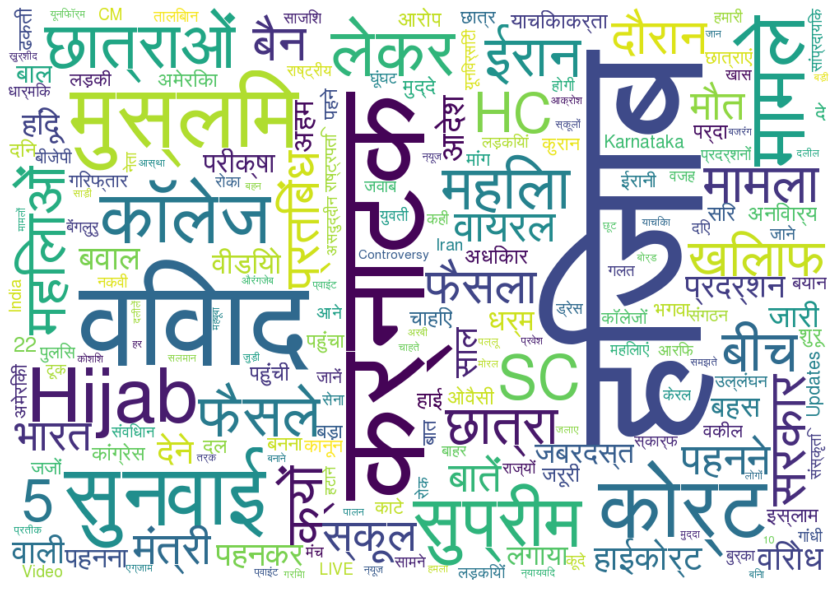

In [59]:
df_list = []
for i in range(len(df)):
    df_list +=df['news_title'][i]

font = "gargi.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()